# Team3_power_consumption


## Description

### Project: Predict the power consumption of a building

The city of Seattle is on a mission to become a carbon-neutral metropolis by the year 2050. One of the main contributors to carbon footprints across the city is its non-residential buildings. In alignment with this mission, a dedicated dataset encompassing emissions from these buildings during the years 2015 and 2016 has been made available. Given the significant expenses involved in surveying every building, our project will harness this dataset to predict the emissions of those buildings yet to be surveyed. In addition, we intend to assess the utility of the ENERGYSTAR Score, a metric that, while intricate in its formulation, might offer critical insights into emission predictions.

## Objectives

- Data Exploration: Delve deep into the dataset through exploratory analysis to uncover underlying patterns, potential anomalies, and the overall data structure.

- Data Cleaning: The second step will involve cleaning the dataset, addressing any missing values, outliers, and inconsistencies to ensure the integrity of our subsequent analyses and models.

- CO2 Emission Prediction: Design and implement models to anticipate the CO2 emissions of non-residential buildings. This predictive analysis will serve as a tool to flag high-emission buildings even in the absence of direct surveys.

- Energy Consumption Estimation: Parallel to the CO2 predictions, we'll predict the total energy consumption of these buildings, furnishing a comprehensive overview of their energy profiles.

- ENERGYSTAR Score Evaluation: We aim to dissect the potential of the ENERGYSTAR Score in predicting emissions. This objective will allow us to ascertain whether this complex metric genuinely offers value or if there's room to streamline its calculation without sacrificing its predictive power.

- Model Experimentation: Different predictive models will be trialed and tested to pinpoint the one rendering the most accurate forecasts. This phase will include rigorous regression performance reviews, hyperparameter optimizations, and judicious ML algorithm selections, all reinforced by cross-validation.

## Constraints

#### 1. Objective of Passing Annual Consumption Records:

- The primary objective of this project is to predict annual power consumption and CO2 emissions of non-residential buildings.
- The project may involve deducing simpler variables related to the nature and proportions of energy sources used within these buildings.
- This implies that the analysis may go beyond just predicting consumption records and could explore additional factors that impact energy use and emissions.

#### 2. Rigorous Evaluation of Regression Performance:

- The project places a strong emphasis on the evaluation of regression models used for prediction.
- It is expected that the performance of these models will be rigorously assessed using appropriate metrics to measure accuracy, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R²).
- The evaluation process will provide insights into how well the models are performing in predicting energy consumption and emissions.

#### 3. Optimizing Hyperparameters and ML Algorithm Choice:

- To achieve accurate predictions, the project involves optimization of hyperparameters. Hyperparameters are configuration settings of machine learning models that can significantly impact their performance.
- Various machine learning algorithms will be considered and tested to determine which one(s) are most effective for this specific prediction task.
- Cross-validation, a technique for assessing model performance on different subsets of the data, will be used to ensure that the chosen model is robust and not overfitting the data.

# 1. Data Acquisition

This section is responsible for importing necessary libraries and reading data from CSV files into Pandas DataFrames.

In [4]:
# Import necessary libraries for data manipulation and analysis
import numpy as np
import pandas as pd

In [5]:
# Read the dataset for the year 2015 into a Pandas DataFrame named 'df2015'
df2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

# Read the dataset for the year 2016 into a Pandas DataFrame named 'df2016'
df2016 = pd.read_csv('2016-building-energy-benchmarking.csv')


In [6]:
# Display the contents of the 'df2015' DataFrame
df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,...,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,...,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,...,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,"{'latitude': '47.68396954', 'longitude': '-122...",4,NORTHEAST,1981,...,0.04,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792


In [7]:
# Display the contents of the 'df2016' DataFrame
df2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


# 2. Data Exploration 
In this section, we delve into the datasets to understand their structure, size, and the nature of the data they contain.

## 2.1 'df2015' DataFrame Exploration
This sub-section explores the 'df2015' DataFrame, including summary statistics and categorical column information.

In [8]:
# Print information about the 'df2015' DataFrame, including data types and missing values
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [9]:
# Check for missing values in the 'df2015' DataFrame and calculate the sum of missing values for each column
df2015.isnull().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

## 2.2 'df2016' DataFrame Exploration
This sub-section explores the 'df2016' DataFrame, including summary statistics and categorical column information.

In [7]:
# Print information about the 'df2016' DataFrame, including data types and missing values
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
# Check for missing values in the 'df2016' DataFrame and calculate the sum of missing values for each column
df2016.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


### Classifying Columns in 'df2015' as Numerical or Categorical

In [11]:
# Select numerical columns (columns with data types 'int64' and 'float64') in the 'df2015' DataFrame
numerical_cols = df2015.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns (columns with data type 'object') in the 'df2015' DataFrame
categorical_cols = df2015.select_dtypes(include=['object']).columns

# Define a function to classify columns as either 'Numerical' or 'Categorical'
def classify_column(col):
    if col in numerical_cols:
        return 'Numerical'
    return 'Categorical'

# Create a DataFrame 'df_classification' to store column names and their respective types (Numerical or Categorical)
df_classification = pd.DataFrame({
    'Column Name': df2015.columns,
    'Type': [classify_column(col) for col in df2015.columns]
})

# Display the 'df_classification' DataFrame, which shows the type of each column in 'df2015'
df_classification

,Column Name,Type
0,OSEBuildingID,Numerical
1,DataYear,Numerical
2,BuildingType,Categorical
3,PrimaryPropertyType,Categorical
4,PropertyName,Categorical
5,TaxParcelIdentificationNumber,Categorical
6,Location,Categorical
7,CouncilDistrictCode,Numerical
8,Neighborhood,Categorical
9,YearBuilt,Numerical


# 3. Missing Data Visualization 
This section visualizes the missing data in the datasets, providing a heatmap representation which can give a clear idea about the columns that might need data imputation or other preprocessing steps.

## 3.1 Visualization of Missing Data in 'df2015'
Visualize missing data in the 'df2015' DataFrame to identify columns with missing values.

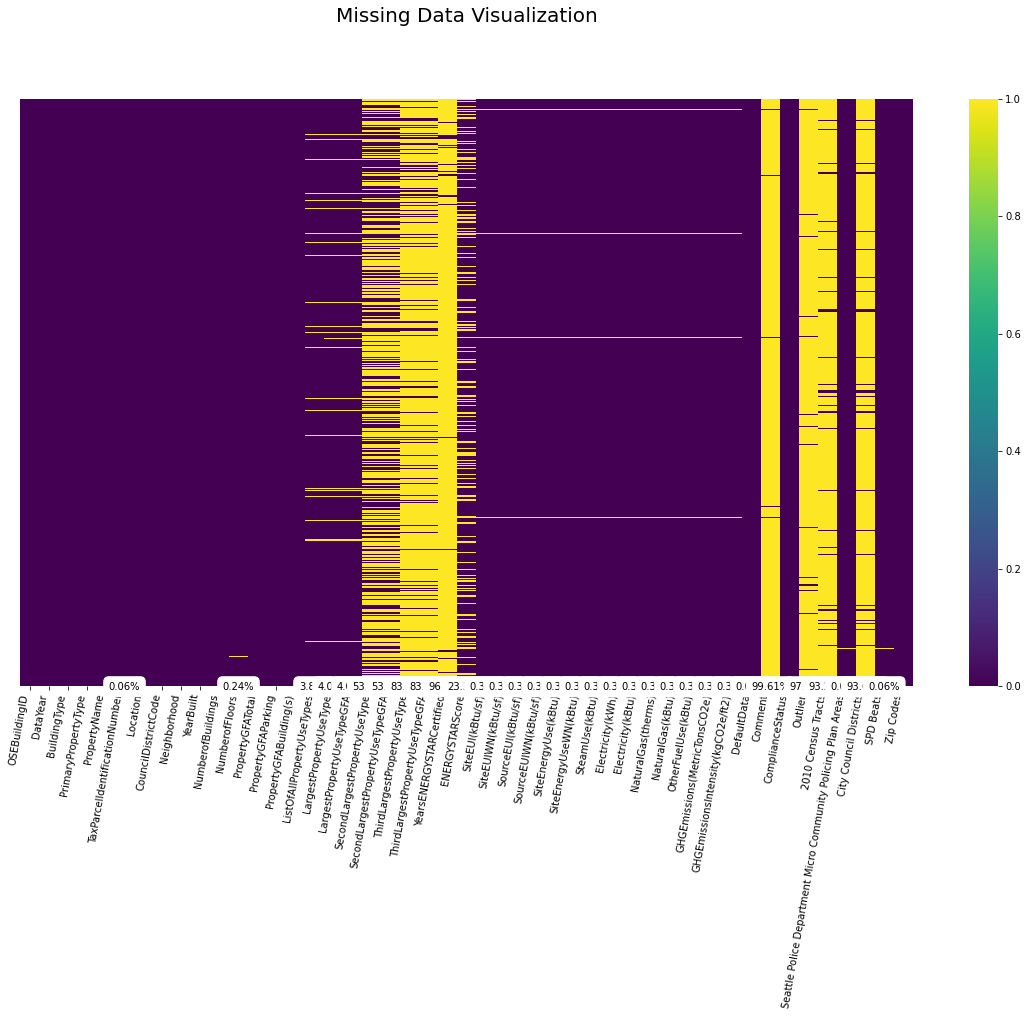

In [12]:
# Import visualization libraries, Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the heatmap
plt.figure(figsize=(20, 12))

# Create a heatmap to visualize missing data in the 'df2015' DataFrame using Seaborn
sns.heatmap(df2015.isnull(), cmap='viridis', cbar=True, yticklabels=False)

# Set the title and adjust its position
plt.title('Missing Data Visualization', fontsize=20, y=1.12)

# Customize the x-axis labels by rotating them and adjusting positions
plt.xticks(np.arange(0.5, len(df2015.columns), 1), df2015.columns, rotation=80, ha='right', fontsize=10)  

# Add grid lines to the plot
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

# Display the percentage of missing data on the plot for each column with missing values
for i, column in enumerate(df2015.columns):
    missing_percentage = df2015[column].isnull().mean()
    if missing_percentage > 0:
        plt.text(i + 0.5, df2015.shape[0] + 4, f"{missing_percentage:.2%}", 
                 ha='center', va='center', fontsize=10, color='black', 
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

# Adjust the position of the plot to make room for x-axis labels
plt.subplots_adjust(bottom=0.2)

# Display the heatmap
plt.show()

### Filtered Visualization for Columns with Missing Data in 'df2015'

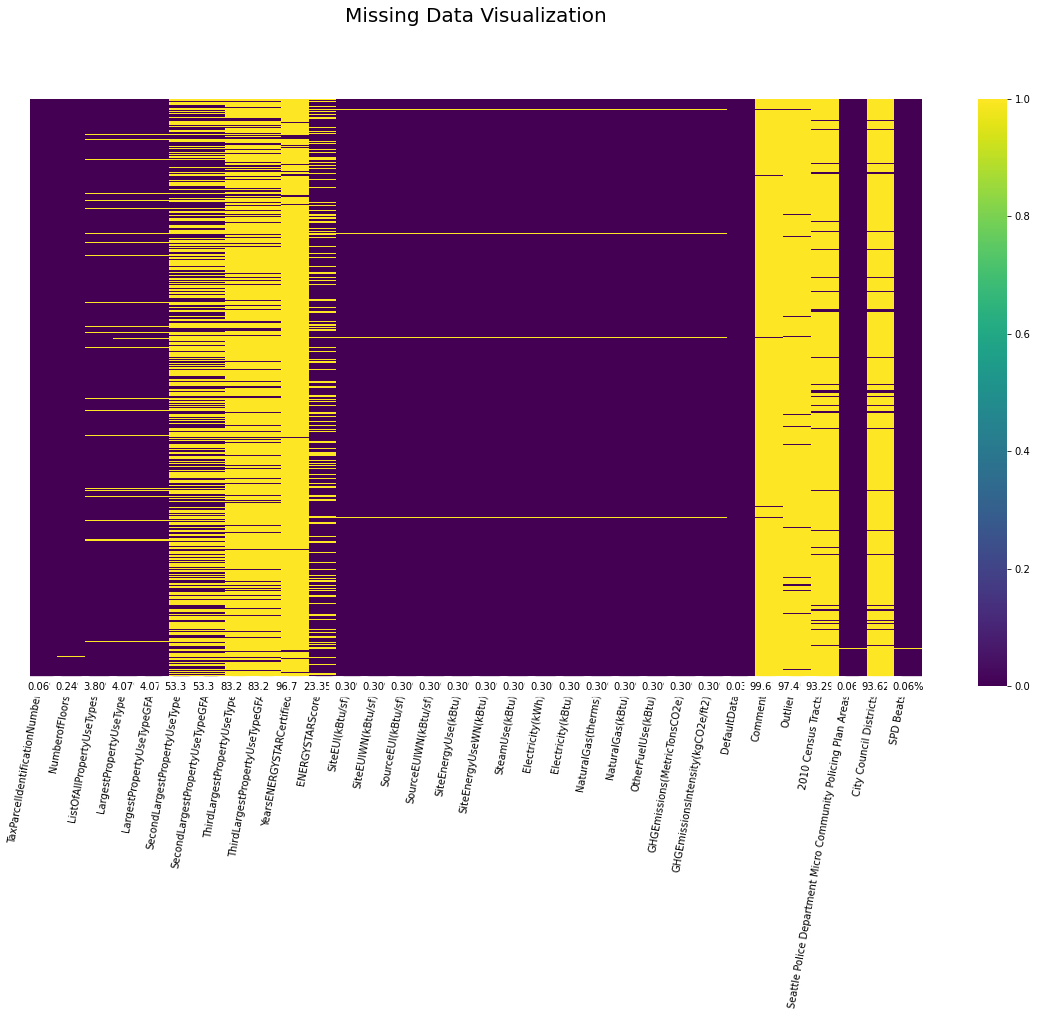

In [13]:
# Identify columns in 'df2015' that contain missing values and store their names in 'missing_data_cols'
missing_data_cols = df2015.columns[df2015.isnull().any()].tolist()

# Create a new DataFrame 'filtered_df' containing only columns with missing data from 'df2015'
filtered_df = df2015[missing_data_cols]

# Set the figure size for the heatmap
plt.figure(figsize=(20, 12))

# Create a heatmap to visualize missing data in the 'filtered_df' DataFrame using Seaborn
sns.heatmap(filtered_df.isnull(), cmap='viridis', cbar=True, yticklabels=False)

# Set the title and adjust its position
plt.title('Missing Data Visualization', fontsize=20, y=1.12)

# Customize the x-axis labels by rotating them and adjusting positions
plt.xticks(np.arange(0.5, len(filtered_df.columns), 1), filtered_df.columns, rotation=80, ha='right', fontsize=10)  

# Add grid lines to the plot
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

# Display the percentage of missing data on the plot for each column with missing values
for i, column in enumerate(filtered_df.columns):
    missing_percentage = filtered_df[column].isnull().mean()
    plt.text(i + 0.5, filtered_df.shape[0] + 4, f"{missing_percentage:.2%}", 
             ha='center', va='center', fontsize=10, color='black', 
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

# Adjust the position of the plot to make room for x-axis labels
plt.subplots_adjust(bottom=0.2)

# Display the heatmap
plt.show()

### Visualization of Missing Data in 'df2016'

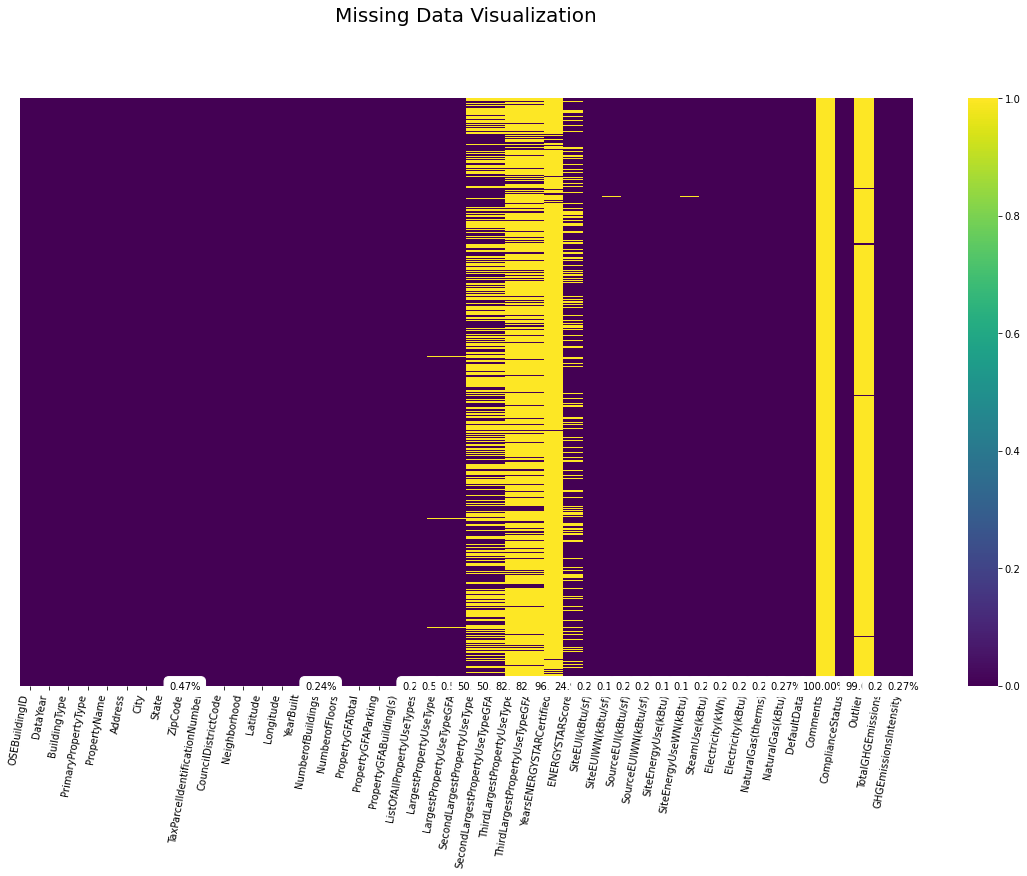

In [14]:
# Import visualization libraries, Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the heatmap
plt.figure(figsize=(20, 12))

# Create a heatmap to visualize missing data in the 'df2016' DataFrame using Seaborn
sns.heatmap(df2016.isnull(), cmap='viridis', cbar=True, yticklabels=False)

# Set the title and adjust its position
plt.title('Missing Data Visualization', fontsize=20, y=1.12)

# Customize the x-axis labels by rotating them and adjusting positions
plt.xticks(np.arange(0.5, len(df2016.columns), 1), df2016.columns, rotation=80, ha='right', fontsize=10) 

# Add grid lines to the plot
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

# Display the percentage of missing data on the plot for each column with missing values
for i, column in enumerate(df2016.columns):
    missing_percentage = df2016[column].isnull().mean()
    if missing_percentage > 0:
        plt.text(i + 0.5, df2016.shape[0] + 4, f"{missing_percentage:.2%}", 
                 ha='center', va='center', fontsize=10, color='black', 
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

# Adjust the position of the plot to make room for x-axis labels
plt.subplots_adjust(bottom=0.2)

# Display the heatmap
plt.show()

### Filtered Visualization for Columns with Missing Data in 'df2016'

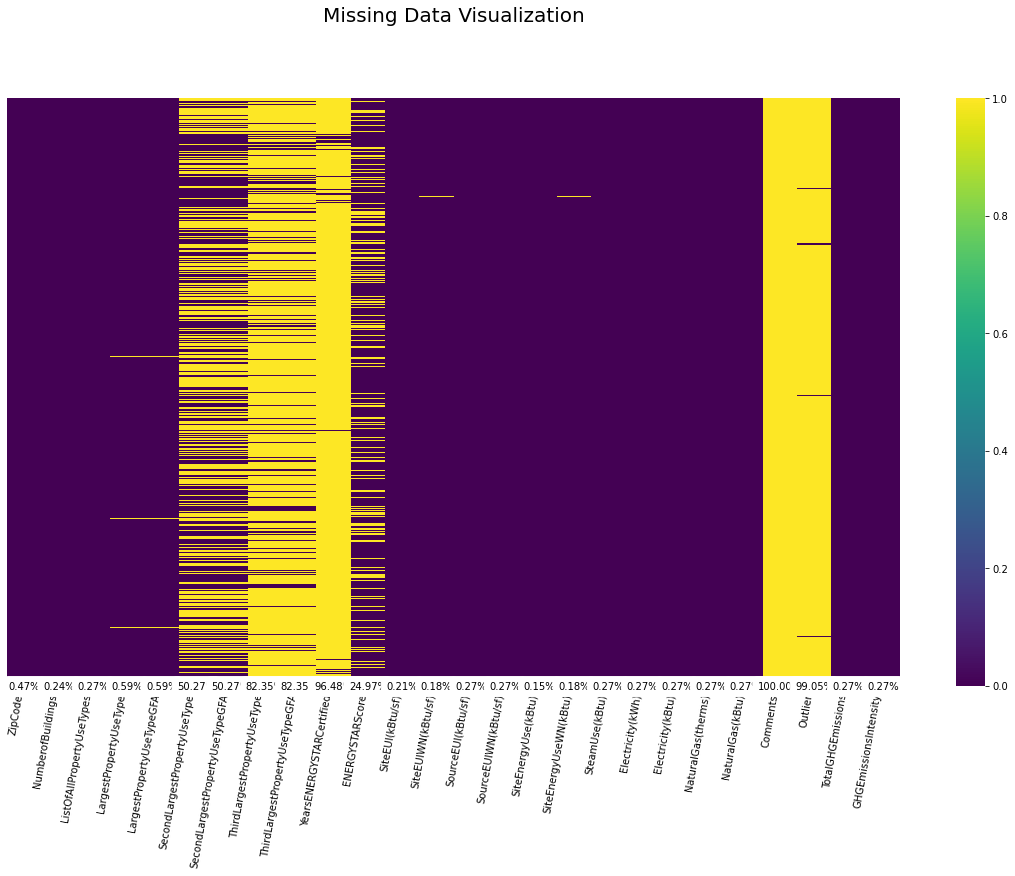

In [15]:
# Identify columns in 'df2016' that contain missing values and store their names in 'missing_data_cols'
missing_data_cols = df2016.columns[df2016.isnull().any()].tolist()

# Create a new DataFrame 'filtered_df' containing only columns with missing data from 'df2016'
filtered_df = df2016[missing_data_cols]

# Set the figure size for the heatmap
plt.figure(figsize=(20, 12))

# Create a heatmap to visualize missing data in the 'filtered_df' DataFrame using Seaborn
sns.heatmap(filtered_df.isnull(), cmap='viridis', cbar=True, yticklabels=False)

# Set the title and adjust its position
plt.title('Missing Data Visualization', fontsize=20, y=1.12)

# Customize the x-axis labels by rotating them and adjusting positions
plt.xticks(np.arange(0.5, len(filtered_df.columns), 1), filtered_df.columns, rotation=80, ha='right', fontsize=10) 

# Add grid lines to the plot
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

# Display the percentage of missing data on the plot for each column with missing values
for i, column in enumerate(filtered_df.columns):
    missing_percentage = filtered_df[column].isnull().mean()
    plt.text(i + 0.5, filtered_df.shape[0] + 4, f"{missing_percentage:.2%}", 
             ha='center', va='center', fontsize=10, color='black', 
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

# Adjust the position of the plot to make room for x-axis labels
plt.subplots_adjust(bottom=0.2)

# Display the heatmap
plt.show()

# 4. Data Summarization
This section is dedicated to summarizing the datasets to provide key statistics, especially focusing on numerical columns, and also showcasing the top unique values for categorical columns.
## 4.1 'df2015' Data Summarization

In [20]:
# Calculate summary statistics for numerical columns in the 'df2015' DataFrame
numerical_summary = df2015.describe()

# Display the numerical summary statistics
numerical_summary

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [17]:
# Select columns with data type 'object', which are typically categorical columns in the 'df2015' DataFrame
categorical_cols = df2015.select_dtypes(include=['object']).columns

# Loop through each categorical column and print summary information
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df2015[col].nunique()}")
    print(f"Most common values:\n{df2015[col].value_counts().head()}\n")

Column: BuildingType
Number of unique values: 7
Most common values:
NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Name: BuildingType, dtype: int64

Column: PrimaryPropertyType
Number of unique values: 27
Most common values:
Low-Rise Multifamily           998
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    297
Other                          258
Non-Refrigerated Warehouse     187
Name: PrimaryPropertyType, dtype: int64

Column: PropertyName
Number of unique values: 3287
Most common values:
WAREHOUSE                   9
OFFICE BUILDING             8
CLOVERDALE BUSINESS PARK    5
APARTMENTS                  4
RUDD COMPANY                3
Name: PropertyName, dtype: int64

Column: TaxParcelIdentificationNumber
Number of unique values: 3245
Most common values:
3224049012    5
925049346     5
2400002       5
7666203240    4
8632880000    4
Name: TaxParcelIdentificationNumber, d

## 4.2 'df2016' Data Summarization

In [18]:
# Calculate summary statistics for numerical columns in the 'df2016' DataFrame
numerical_summary = df2016.describe()

# Display the numerical summary statistics
numerical_summary

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [19]:
# Select columns with data type 'object', which are typically categorical columns in the 'df2016' DataFrame
categorical_cols = df2016.select_dtypes(include=['object']).columns

# Loop through each categorical column and print summary information
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df2016[col].nunique()}")
    print(f"Most common values:\n{df2016[col].value_counts().head()}\n")

Column: BuildingType
Number of unique values: 8
Most common values:
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Name: BuildingType, dtype: int64

Column: PrimaryPropertyType
Number of unique values: 24
Most common values:
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Name: PrimaryPropertyType, dtype: int64

Column: PropertyName
Number of unique values: 3362
Most common values:
Northgate Plaza         3
Crestview Apartments    2
Central Park            2
South Park              2
Lakeview                2
Name: PropertyName, dtype: int64

Column: Address
Number of unique values: 3354
Most common values:
2203 Airport Way S             4
309 South Cloverdale Street    4
2600 SW Barton St              4
201 Thomas St.                 2
10510 5th Ave NE            

# Dataset Comparison

In [26]:
import pandas as pd

columns_df2015 = set(df2015.columns)
columns_df2016 = set(df2016.columns)

common_columns = columns_df2015.intersection(columns_df2016)

print("Common Columns:")
print("----------------")
if common_columns:
    print('\n'.join(common_columns))
else:
    print("No common columns")


Common Columns:
----------------
NumberofFloors
ThirdLargestPropertyUseType
SiteEnergyUse(kBtu)
NumberofBuildings
LargestPropertyUseType
OSEBuildingID
PropertyGFABuilding(s)
SecondLargestPropertyUseType
SiteEUIWN(kBtu/sf)
ComplianceStatus
LargestPropertyUseTypeGFA
Outlier
SourceEUIWN(kBtu/sf)
DataYear
PropertyGFATotal
BuildingType
TaxParcelIdentificationNumber
PropertyGFAParking
Neighborhood
SecondLargestPropertyUseTypeGFA
ListOfAllPropertyUseTypes
YearBuilt
PrimaryPropertyType
CouncilDistrictCode
YearsENERGYSTARCertified
SourceEUI(kBtu/sf)
SiteEnergyUseWN(kBtu)
ThirdLargestPropertyUseTypeGFA
DefaultData
SiteEUI(kBtu/sf)
NaturalGas(therms)
NaturalGas(kBtu)
PropertyName
ENERGYSTARScore
Electricity(kBtu)
SteamUse(kBtu)
Electricity(kWh)


In [27]:
in_df2015_not_in_df2016 = columns_df2015.difference(columns_df2016)

print("Columns in df2015 but not in df2016:")
print("------------------------------------")
if in_df2015_not_in_df2016:
    print('\n'.join(in_df2015_not_in_df2016))
else:
    print("No such columns")


Columns in df2015 but not in df2016:
------------------------------------
OtherFuelUse(kBtu)
Location
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
SPD Beats
Zip Codes
City Council Districts
GHGEmissions(MetricTonsCO2e)


In [28]:
in_df2016_not_in_df2015 = columns_df2016.difference(columns_df2015)

print("Columns in df2016 but not in df2015:")
print("------------------------------------")
if in_df2016_not_in_df2015:
    print('\n'.join(in_df2016_not_in_df2015))
else:
    print("No such columns")


Columns in df2016 but not in df2015:
------------------------------------
GHGEmissionsIntensity
City
Comments
ZipCode
Address
State
Longitude
TotalGHGEmissions
Latitude
